# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city1 = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
print(lats)

[-8.40919630e+01 -7.58354372e+01  3.55259316e-02 ... -2.56431154e+01
  3.89364938e+01  6.86389168e+01]


In [4]:
print(lngs)

[  42.4981055   -60.0353572   136.90686846 ... -150.76131218  103.26203417
 -137.0543476 ]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# Starting URL for Weather Map API Call
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# set up additional columns to hold information
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


print(f'Beginning Data Retrieval\n------------------------')

count = 1
sets = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:  
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_count = response["name"]
        print(f"Processing Record {count} of Set {sets} | {city_count}")
       #print(f"{query_url}&q={city}")
        
        # Increase counter by one 
        count = count + 1

        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    
    if count == 51:
        count = 1 
        sets = sets+1
    
    continue
    
print(f'------------------------\nData Retrieval Complete\n------------------------')

 

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | Port Alfred
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Biak
Processing Record 4 of Set 1 | Butaritari
Processing Record 5 of Set 1 | Saint George
Processing Record 6 of Set 1 | Werda
Processing Record 7 of Set 1 | Tuktoyaktuk
Processing Record 8 of Set 1 | Hilo
Processing Record 9 of Set 1 | Provideniya
Processing Record 10 of Set 1 | Williams Lake
Processing Record 11 of Set 1 | San Ramon
Processing Record 12 of Set 1 | Georgetown
Processing Record 13 of Set 1 | Shelburne
Processing Record 14 of Set 1 | La Cruz
Processing Record 15 of Set 1 | Bambous Virieux
Processing Record 16 of Set 1 | Talnakh
Processing Record 17 of Set 1 | Ikongo
City not found. Skipping...
Processing Record 18 of Set 1 | Saldanha
Processing Record 19 of Set 1 | Taua
Processing Record 20 of Set 1 | Mount Isa
Processing Record 21 of Set 1 | Wiarton
Processing Record 22 of Set 1 | Ponta do Sol
Processing Rec

Processing Record 39 of Set 4 | Ilulissat
Processing Record 40 of Set 4 | Codajas
Processing Record 41 of Set 4 | Norman Wells
Processing Record 42 of Set 4 | Klobuck
Processing Record 43 of Set 4 | Miyako
City not found. Skipping...
Processing Record 44 of Set 4 | Coihaique
Processing Record 45 of Set 4 | Phan Thiet
City not found. Skipping...
Processing Record 46 of Set 4 | Santa Vitoria do Palmar
Processing Record 47 of Set 4 | Opuwo
Processing Record 48 of Set 4 | Cherskiy
Processing Record 49 of Set 4 | Kuching
Processing Record 50 of Set 4 | Yar-Sale
Processing Record 1 of Set 5 | San Pedro
Processing Record 2 of Set 5 | Itarema
Processing Record 3 of Set 5 | Kyabe
City not found. Skipping...
Processing Record 4 of Set 5 | Kalabo
Processing Record 5 of Set 5 | Marondera
Processing Record 6 of Set 5 | Dhidhdhoo
Processing Record 7 of Set 5 | Mount Gambier
Processing Record 8 of Set 5 | Lakes Entrance
Processing Record 9 of Set 5 | Yerkoy
Processing Record 10 of Set 5 | Naryan-Mar


Processing Record 23 of Set 8 | Shinpokh
Processing Record 24 of Set 8 | Belaya Gora
Processing Record 25 of Set 8 | Rybachiy
Processing Record 26 of Set 8 | Bibiani
Processing Record 27 of Set 8 | Ialibu
Processing Record 28 of Set 8 | Vrangel
Processing Record 29 of Set 8 | Aracataca
Processing Record 30 of Set 8 | Poum
Processing Record 31 of Set 8 | Padang
Processing Record 32 of Set 8 | Lagoa
Processing Record 33 of Set 8 | Saint-Francois
Processing Record 34 of Set 8 | Yulara
Processing Record 35 of Set 8 | Vaitape
Processing Record 36 of Set 8 | Marica
Processing Record 37 of Set 8 | Harper
Processing Record 38 of Set 8 | Martapura
Processing Record 39 of Set 8 | Alta Floresta
Processing Record 40 of Set 8 | Phuthaditjhaba
Processing Record 41 of Set 8 | Agua Verde
Processing Record 42 of Set 8 | Salisbury
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 8 | Carauari
Processing Record 44 of Set 8 | Sindor
Processing Record 45 of Set 8 | Xining


Processing Record 6 of Set 12 | Oktyabrskoye
Processing Record 7 of Set 12 | Phalaborwa
City not found. Skipping...
Processing Record 8 of Set 12 | Sechelt
Processing Record 9 of Set 12 | Wangqing
Processing Record 10 of Set 12 | Bubaque
Processing Record 11 of Set 12 | Boa Vista
Processing Record 12 of Set 12 | Kathu
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 12 | Berlin
Processing Record 14 of Set 12 | Jinchang
------------------------
Data Retrieval Complete
------------------------


In [31]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
#Display the DataFrame


WeatherPy_df = pd.DataFrame({
                    "City": city_name,
                    "Cloudiness":cloudiness, 
                    "Country":country,
                    "Date":date, 
                    "Humidity": humidity,
                    "Lat":lat, 
                    "Lng":lng, 
                    "Max Temp": max_temp,
                    "Wind Speed":wind_speed
})

WeatherPy_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,0,ZA,1562883654,81,-33.59,26.89,63.00,7.00
1,Ushuaia,75,AR,1562883655,93,-54.81,-68.31,37.40,21.92
2,Biak,100,ID,1562883657,98,-0.91,122.88,62.13,4.63
3,Butaritari,40,KI,1562883658,73,3.07,172.79,84.63,11.92
4,Saint George,40,GR,1562883659,77,39.45,22.34,68.00,3.53


In [32]:
WeatherPy_df.to_csv('cities.csv')

In [18]:
WeatherPy_df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

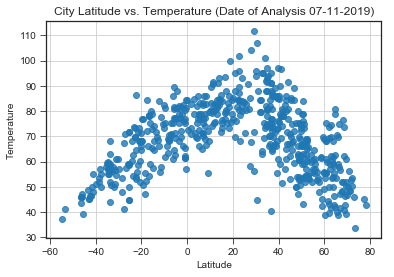

In [39]:
plt.style.use('seaborn-ticks')
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Max Temp'], marker ='o', alpha = 0.8)
plt.title("City Latitude vs. Temperature (Date of Analysis 07-11-2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig("Temperature.png", dpi=800)
plt.show()

#### Latitude vs. Humidity Plot

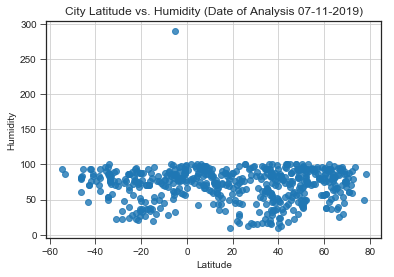

In [43]:
plt.style.use('seaborn-ticks')
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Humidity'], marker ='o', alpha = 0.8)
plt.title("City Latitude vs. Humidity (Date of Analysis 07-11-2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Humidity.png", dpi=800)
plt.show()

#### Latitude vs. Cloudiness Plot

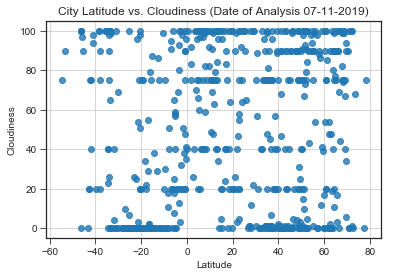

In [44]:
plt.style.use('seaborn-ticks')
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Cloudiness'], marker ='o', alpha = 0.8)
plt.title("City Latitude vs. Cloudiness (Date of Analysis 07-11-2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Cloudiness.png", dpi=800)
plt.show()

#### Latitude vs. Wind Speed Plot

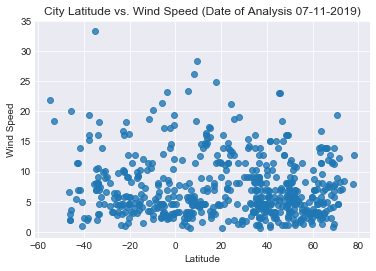

In [45]:
plt.style.use('seaborn-ticks')
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Wind Speed'], marker ='o', alpha = 0.8)
plt.title("City Latitude vs. Wind Speed (Date of Analysis 07-11-2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Wind Speed.png", dpi=800)
plt.show()